In [ ]:
!pip install git+https://github.com/Ritvik19/pyradox.git

In [2]:
import keras
import numpy as np
from pyradox import convnets

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
y_train = keras.utils.to_categorical(y_train, 10)

x_test = x_test.astype("float32") / 255
x_test = np.expand_dims(x_test, -1)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
inputs = keras.Input(shape=(28, 28, 1))
x = keras.layers.ZeroPadding2D(2)(inputs)                # padding to increase dimenstions to 32x32
x = keras.layers.Conv2D(3, (1, 1), padding='same')(x)    # increasing the number of channels to 3
x = convnets.VGG19()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)

model = keras.models.Model(inputs=inputs, outputs=outputs) 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 3)         6         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       7385

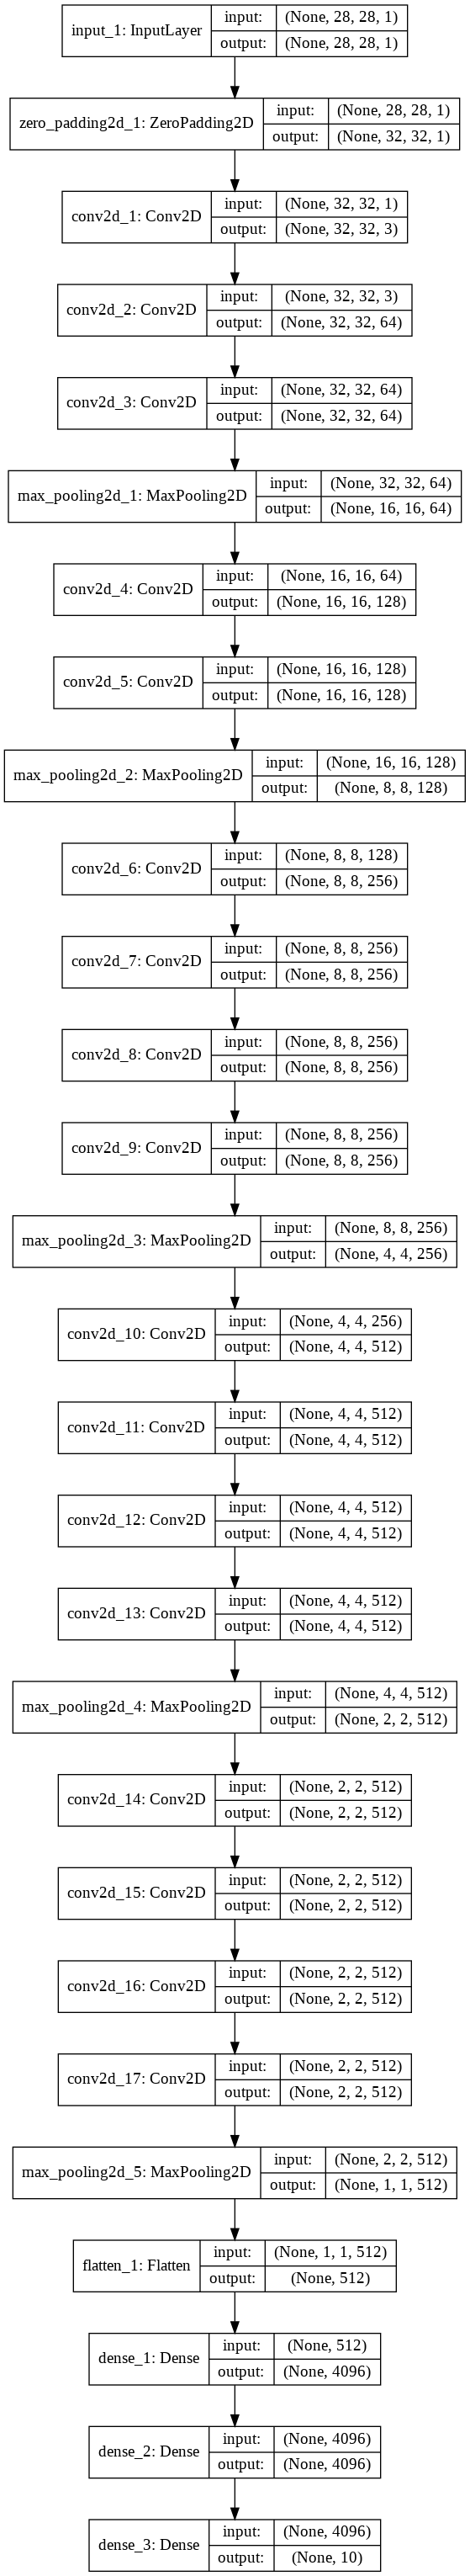

In [5]:
model.summary()
keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 117s 2ms/step - loss: 2.3017 - val_loss: 2.3014
